# Multiobjective evolutionary optimization
This example shows how to run the optimization algorithms contained in the `evoalgos` package. It optimises four typical SWIM parameters to the (reversed) NSE and absolute bias at the Blankenstein station.

In [1]:
# hidden cell: code to setup
import swimpy, os, shutil
%matplotlib inline

test_path = os.path.join(os.path.dirname(swimpy.__file__), '../tests')
project_path = os.path.join(test_path, 'project')
os.chdir(project_path)

if not os.path.exists('swimpy'):
    raise RuntimeError('Make sure the project is setup.')

shutil.copy(os.path.join(test_path, 'test_settings.py'), os.path.join('swimpy', 'settings.py'))
with open(os.path.join(project_path, 'swimpy', 'settings.py'), 'a') as f:
    f.write("from swimpy.optimization import SMSEMOA\n")


## *Prerequisites*

The objective functions used here (NSE and pbias) rely on observed discharge, i.e. make sure the `stations` are [properly setup](../modules/utils.rst#swimpy.utils.StationsUnconfigured) in the `swimpy/settings.py` file.

In [2]:
import swimpy

objectives = ['station_daily_discharge.rNSE.BLANKENSTEIN',
              'station_daily_discharge.pbias_abs.BLANKENSTEIN']

# low, high ranges
parameters = {'smrate': (0.2, 0.7),
              'sccor': (0.1, 10),
              'ecal': (0.7, 1.3),
              'roc2': (0.5, 10)}

# load the project instance
p = swimpy.Project()

# adjust runtime and make sure subcatch is switched off
p.config_parameters(nbyr=2)
p.basin_parameters(subcatch=0)

run = p.SMSEMOA(parameters, objectives, population_size=10, max_generations=10)

Test objective values:
station_daily_discharge.pbias_abs.BLANKENSTEIN=21.27476978
station_daily_discharge.rNSE.BLANKENSTEIN=0.86287377
SMSEMOA running on problem SMSEMOA


/Users/wortmann/Desktop/source/swimpy/swimpy/utils.py:352: UserWarning: Using multiprocessing on 4 CPUs.
  warnings.warn(msg)


Generation 1 completed in 0:00:12.692437, mean generation time 0:00:14.765706, max_generations in ~0:01:13.828530 hh:mm:ss
Objectives (median, min):
station_daily_discharge.pbias_abs.BLANKENSTEIN: 10.396697 0.006593
station_daily_discharge.rNSE.BLANKENSTEIN: 0.810816 0.666419
Generation 2 completed in 0:00:15.680891, mean generation time 0:00:15.070767, max_generations in ~0:01:00.283068 hh:mm:ss
Objectives (median, min):
station_daily_discharge.pbias_abs.BLANKENSTEIN: 6.541831 0.006593
station_daily_discharge.rNSE.BLANKENSTEIN: 0.721878 0.666419
Generation 3 completed in 0:00:15.384044, mean generation time 0:00:15.149086, max_generations in ~0:00:45.447258 hh:mm:ss
Objectives (median, min):
station_daily_discharge.pbias_abs.BLANKENSTEIN: 4.470950 0.006593
station_daily_discharge.rNSE.BLANKENSTEIN: 0.728671 0.666419
Generation 4 completed in 0:00:17.024623, mean generation time 0:00:15.524194, max_generations in ~0:00:31.048388 hh:mm:ss
Objectives (median, min):
station_daily_discharg

## Visualising the results

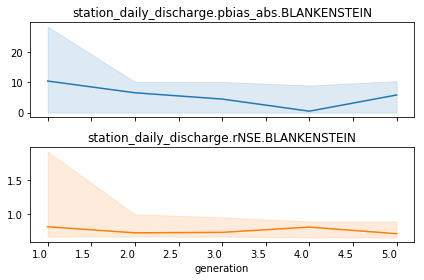

In [20]:
from matplotlib import pyplot as plt

# development of objective functions with generations
_ = run.optimization_populations.plot_generation_objectives()

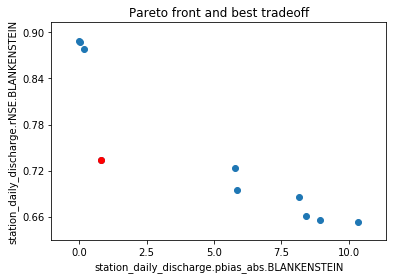

In [17]:
# the Pareto front with the 'best tradeoff' marked
run.optimization_populations.plot_objective_scatter(best=True)
title = plt.title('Pareto front and best tradeoff')

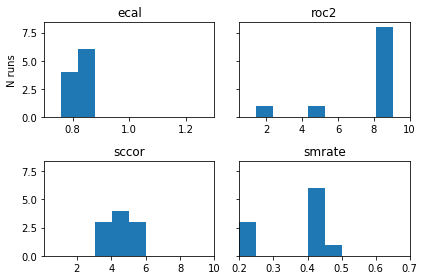

In [18]:
# parameter distribution
_ = run.optimization_populations.plot_parameter_distribution()